# Thesis    

# Chapeter 2

## Fourrie Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots

In [2]:
# plt.style.use('science')

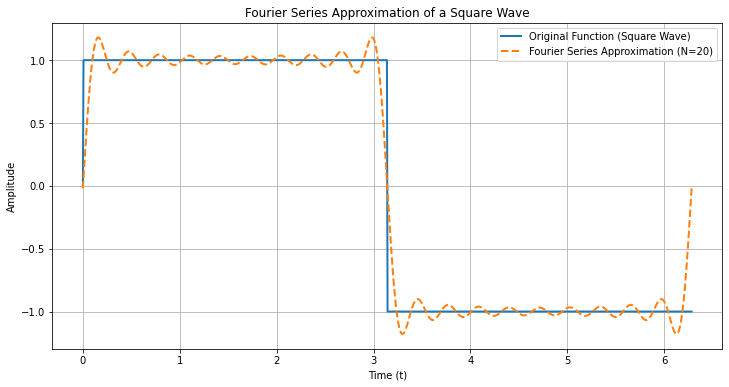

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the period
T = 2 * np.pi

# Define the time variable
t = np.linspace(0, T, 1000)

# Define the original periodic function (a square wave in this example)
def original_function(t):
    return np.sign(np.sin(t))

# Compute the Fourier Series approximation
def fourier_series(t, N):
    a0 = 0
    f_sum = a0
    for n in range(1, N + 1):
        an = (2 / T) * np.trapz(original_function(t) * np.cos(2 * np.pi * n * t / T), t)
        bn = (2 / T) * np.trapz(original_function(t) * np.sin(2 * np.pi * n * t / T), t)
        f_sum += an * np.cos(2 * np.pi * n * t / T) + bn * np.sin(2 * np.pi * n * t / T)
    return f_sum

# Plot the original function and its Fourier Series approximation
plt.figure(figsize=(12, 6))

# Plot original function
plt.plot(t, original_function(t), label='Original Function (Square Wave)', linewidth=2)

# Plot Fourier Series approximation
N = 20  # Number of terms in Fourier Series
plt.plot(t, fourier_series(t, N), label=f'Fourier Series Approximation (N={N})', linestyle='--', linewidth=2)

# Labels and legend
plt.title('Fourier Series Approximation of a Square Wave')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
# Show plot
plt.show()


In [3]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import ipywidgets as widgets
from IPython.display import display

# Define the period
T = 2 * np.pi

# Define the time variable
t = np.linspace(0, T, 1000)

# Define the original periodic functions
def square_wave(t):
    return np.sign(np.sin(t))

def smooth_wave(t):
    return np.sin(t)

def triangle_wave(t):
    return 2 * np.abs(2 * (t / T - np.floor(t / T + 0.5))) - 1

def semi_circle_wave(t):
    return np.sqrt(1 - (2 * (t / T - np.floor(t / T + 0.5)))**2)

# Define the original periodic function
original_function =square_wave

# Compute the Fourier Series approximation
def fourier_series_plotly(t, N):
    a0 = 0
    f_sum = np.zeros_like(t)
    for n in range(1, N + 1):
        an = (2 / T) * np.trapz(original_function(t) * np.cos(2 * np.pi * n * t / T), t)
        bn = (2 / T) * np.trapz(original_function(t) * np.sin(2 * np.pi * n * t / T), t)
        f_sum += an * np.cos(2 * np.pi * n * t / T) + bn * np.sin(2 * np.pi * n * t / T)
    return f_sum

# # Function to download the plot as a PDF
# def download_pdf(button):
#     pio.write_image(fig, 'fourier_series_approximation.pdf', format='pdf')
#     pio.write_image(fig, 'fourier_series_approximation.png', format='png')
#     print("Downloaded!")

# Create initial plot data
fourier_approx = [fourier_series_plotly(t, N) for N in range(1, 101)]

# Create the figure
fig = go.Figure()

# Add the original function trace

# Create slider steps
steps = []
for i in range(100):
    step = dict(
        method="update",
        args=[{"y": [original_function(t), fourier_approx[i]]},
              {"annotations": [{"text": f"Fourier Series Approximation (N={i+1})"}]}],
        label=f"{i+1}"
    )
    steps.append(step)

fig.add_trace(go.Scatter(x=t, y=original_function(t), mode='lines', name='Original Function (Square Wave)', line=dict(width=2)))

# Add the Fourier series approximation trace (initially with N=1)
fourier_trace = go.Scatter(x=t, y=fourier_approx[41], mode='lines', name=f'Fourier Series Approximation', line=dict(dash='dash', width=3))
fig.add_trace(fourier_trace)

# Add sliders
sliders = [dict(
    active=41,
    currentvalue={"prefix": "N="},
    pad={"t": 50},
    steps=steps,
    y = -.25
)]

fig.update_layout(
    sliders=sliders,
    title='Fourier Series Approximation of a Square Wave',
    xaxis_title='Time (t)',
    yaxis_title='Amplitude',
    # legend_title='Legend',
    template='plotly_white'
)

#set the legent to the bottom 
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.5,
    ),width=550, height=450)

# fig.update_layout()
# Display the plot and the download button
# tight_layout() is used to ensure the plot fits in the output cell
fig.update_layout(showlegend=True)
# fig.write_image('figuras/fourier_series_approximation.pdf')
# fig.write_image('figuras/fourier_series_approximation.png')
fig.show()
# Create a button for downloading the plot


# download_button = widgets.Button(description="save fig")
# download_button.on_click(download_pdf)

# display(download_button)


In [4]:
import numpy as np
import plotly.graph_objs as go
# import kaleido

def download_pdf(button):
    pio.write_image(fig, '3D_frequencie space_time.pdf', format='pdf')
    print("PDF downloaded!")

# Definindo parâmetros das senoidais
frequencies = [2, 5  ]  # Frequências das senoidais
amplitudes =  [1, 0.5]  # Amplitudes das senoidais
duration = 2  # Duração do sinal em segundos
sampling_rate = 1000  # Taxa de amostragem (amostras por segundo)

# Vetor de tempo
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

x_axis = np.linspace(0, 2*np.pi, 1000)
y_axis = np.linspace(0, 2*np.pi, 1000)
z_axis = np.linspace(0, 2*np.pi, 1000)
colors = ['orange', 'blue']
# Criando os gráficos
fig = go.Figure()
signals = []
# Adicionando cada sinal ao gráfico 3D
for idx, frequency in enumerate(frequencies):
    signal = amplitudes[idx] * np.sin(2 * np.pi * frequency * t)
    signals.append(signal)
    fig.add_trace(go.Scatter3d(x=t, y=np.full_like(t, frequency), z=signal, mode='lines', name=f'Sinal {idx+1}',line=dict(color=colors[idx]),showlegend=True))

# Calculando a soma dos sinais
sum_signal = np.sum(signals, axis=0)
max_aplitude = np.max(signals)
min_aplitude = np.min(signals)
min_t = np.min(t)
max_t = np.max(t)

# Adicionando a soma ao gráfico 3D
fig.add_trace(go.Scatter3d(x=t, y=np.full_like(t, frequency)+1.5, z=sum_signal, mode='lines', name='Sum', line=dict(color='red')))

# Adicionando a linha com a seta representando a origem do sistema
arrow_length = max(np.max(sum_signal), max(amplitudes)) * 0.5
fig.add_trace(go.Cone(x=[0], y=[0], z=[max_aplitude], u=[0], v=[0], w=[arrow_length], showscale=False, colorscale='Greys'))
fig.add_trace(go.Cone(x=[0], y=[6], z=[min_aplitude], u=[0], v=[arrow_length], w=[0], showscale=False, colorscale='Greys'))
fig.add_trace(go.Cone(x=[t[-1]], y=[0], z=[min_aplitude], u=[arrow_length], v=[0], w=[0], showscale=False, colorscale='Greys'))
fig.add_trace(go.Scatter3d(x=t,               y=np.zeros_like(t),z=np.ones_like(t)*min_aplitude          , mode='lines', line=dict(color='gray'), showlegend=False))
fig.add_trace(go.Scatter3d(x=np.zeros_like(t),y=np.linspace(0,6),z=np.ones_like(t)*min_aplitude          , mode='lines', line=dict(color='gray'), showlegend=False))
fig.add_trace(go.Scatter3d(x=np.zeros_like(t),y=np.zeros_like(t),z=np.linspace(min_aplitude,max_aplitude), mode='lines', line=dict(color='gray'), showlegend=False))
# Configurando o layout

# Calculando a FFT dos sinais
fft_freq = np.fft.fftfreq(len(t), d=1/sampling_rate)
fft_signals = [np.abs(np.fft.fft(signal)) for signal in [sum_signal] + [amplitude * np.sin(2 * np.pi * frequency * t) for frequency, amplitude in zip(frequencies, amplitudes)]]

# #Adicionando os gráficos da FFT no plano yz com x = 0
fig.add_trace(go.Scatter3d(
    x=np.zeros(len(fft_freq)//2)-1,#+2.5, 
    y=fft_freq[:len(fft_freq)//2][0:13], 
    z=fft_signals[0][:len(fft_freq)//2][0:13]/np.max(fft_signals[0][:len(fft_freq)//2][0:13]), 
    mode='lines',
    name=f'FFT Sinal',
    line=dict(
        width=5,
        color=fft_freq[:len(fft_freq)//2][0:13],  # Use fft_freq como a cor para gradiente
        colorscale=[
            [0.0, "red"],
            [2/6, "orange"],
            [4/6, "blue"],
            [1., "purple"]
        ],#colorbar=dict(title='Frequencies'),
        cmin=np.min(fft_freq[:len(fft_freq)//2][0:13]),  # Valor mínimo da cor
        cmax=np.max(fft_freq[:len(fft_freq)//2][0:13])   # Valor máximo da cor
    ),
    showlegend=False
))

fig.update_layout(title='Splited Sinuidal Signals',
                  #set title position
                #   title_x=0.5,
                    title_y=0.9,
                  scene=dict(xaxis_title='Time',
                             yaxis_title='Frequency',
                             zaxis_title='Amplitude'),
                  legend=dict(
                    orientation="h",
                    yanchor="bottom",
                    y=.9,
                    xanchor="right",
                    x=1.
),width=550, height=450)


# fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)  # Define todas as margens para 20 pixels
)
# Exibindo o gráfico
fig.show()
# fig.write_image("figuras/signal_in_time_and_frequency.pdf")#, scale=300)
# fig.write_image("figuras/signal_in_time_and_frequency.png")
# download_button = widgets.Button(description="Download as PDF")
# download_button.on_click(download_pdf)
# display(download_button)



In [5]:
def plot_psd(data,label='PSD',color='k',is_subplot = False,axis=None):
  '''
  This functions will show the PSD representation for any time series
  '''
  ft   = np.fft.fft(data)
  ft   = np.real(ft*np.conj(ft))
  freq = np.fft.fftfreq(len(ft))
  cond = (freq>0.0)
  ft,freq = ft[cond],freq[cond]  
  seq  = np.argsort(freq)
  
  a,b  = np.polyfit(np.log(freq[freq>0.0]),np.log(ft[freq>0.0]),deg=1)
  text = "{} {}f + {}".format(label,np.round(a,3),np.round(b,3))
  #plota o psd
  if is_subplot:
    return freq[seq],ft[seq], a,b 
  else:
    return plt.loglog(freq[seq],ft[seq],color=color,label=text)


from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
def norm(data):
  '''
  Normalize the dataframe from -1 to 1
  '''
  scaler = MinMaxScaler((-1,1))
  data1 = np.reshape(data,(-1, 1))
  data1 = scaler.fit_transform(data1)
  data2 = np.reshape(data1,len(data1))
  return data1, data2


## Colored Noise

In [6]:
import colorednoise as cn
samples = 2**20 #Numbert os points

# wn = cn.powerlaw_psd_gaussian(0, samples)   #White noise generation
# pn = cn.powerlaw_psd_gaussian(1, samples)   #Pink Noise generation
# tn = cn.powerlaw_psd_gaussian(5/3, samples) #Turbulence data generation
# rn = cn.powerlaw_psd_gaussian(2, samples)   #Red Noise gereneration
 
# #Normalizing to -1 to 1 data
# wn1,wn2 = norm(wn)
# pn1,pn2 = norm(pn)
# rn1,rn2 = norm(rn) 
# tn1,tn2 = norm(tn) 

# noises = [wn2,pn2,tn2,rn2]
# np.save('noises.npy',noises)

noises = np.load('data/noises.npy')

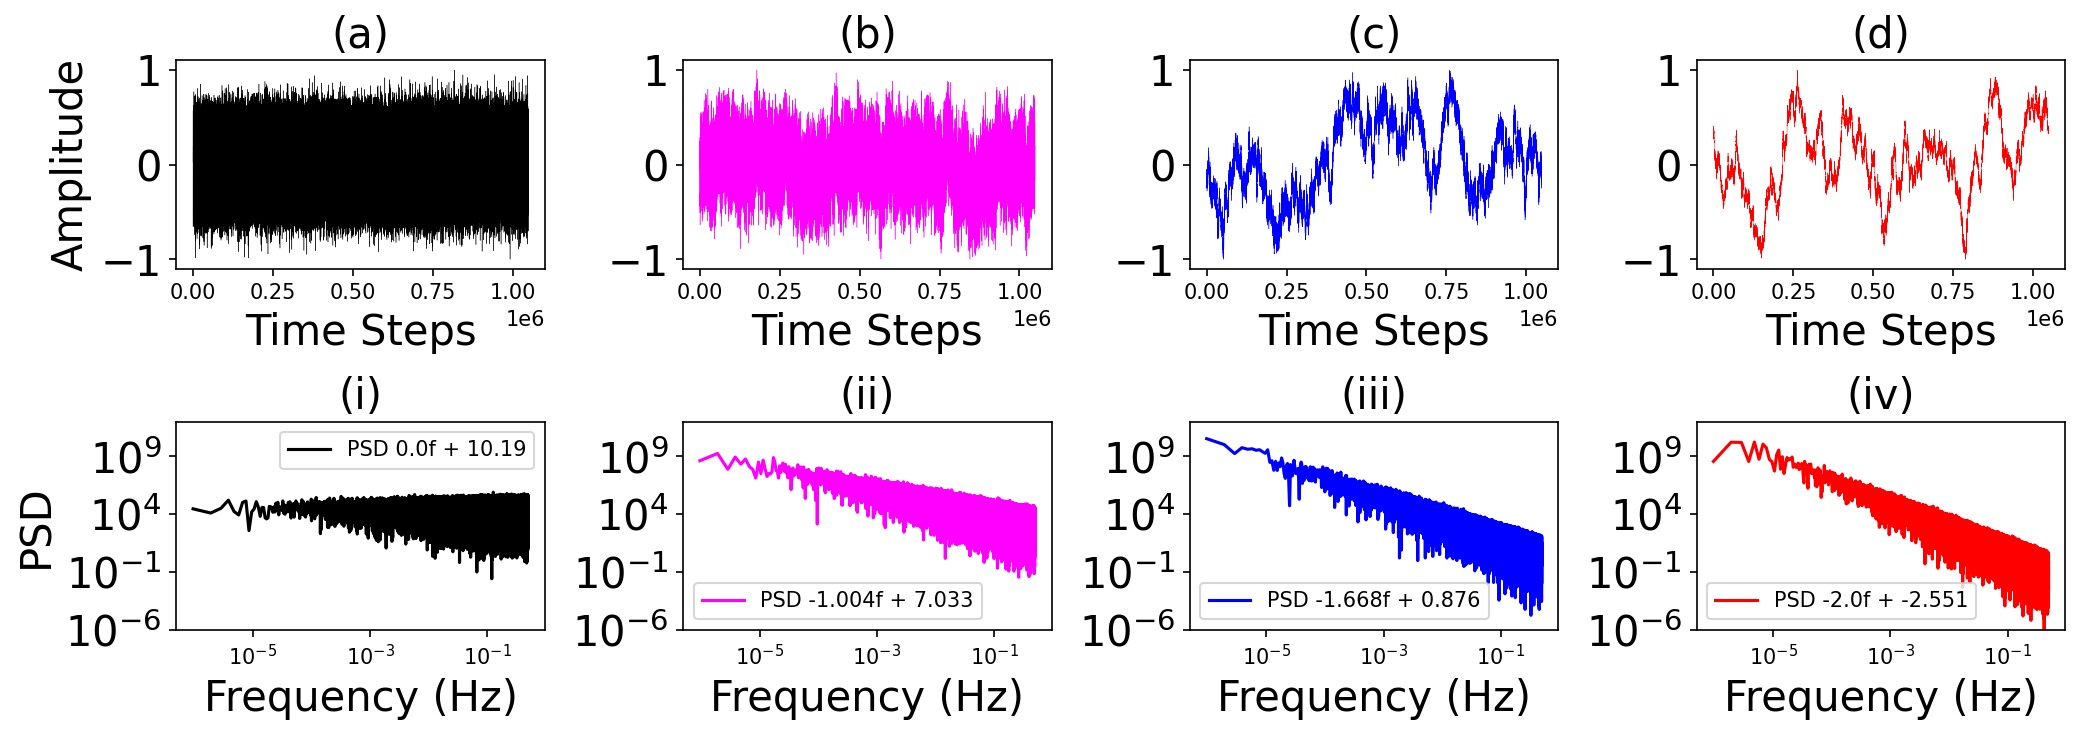

In [25]:

color_noise2 = ['black','magenta','blue','red']
leters2 = ['(a)','(b)','(c)','(d)']
romains = ['(i)','(ii)','(iii)','(iv)']

plt.figure(figsize=(14,5),dpi=150)
font=20
for i in range(len(noises)):
    plt.subplot(2,4,i+1)
    plt.plot(noises[i],color=color_noise2[i],alpha=1,linewidth=0.2)
    plt.title(leters2[i],fontsize=font)
    plt.xlabel('Time Steps',fontsize=font)
    if i == 0: plt.ylabel('Amplitude',fontsize=font)
    plt.yticks(fontsize=font)

    plt.subplot(2,4,i+5)
    plot_psd(noises[i],color=color_noise2[i])
    plt.ylim(1e-6,1e12)
    plt.yticks(fontsize=font)
    plt.legend()
    plt.xlabel('Frequency (Hz)',fontsize=font)
    if i == 0: plt.ylabel('PSD',fontsize=font)
    plt.title(romains[i],fontsize=font)


plt.tight_layout()
plt.savefig('figuras/PSD_all_data.png',dpi=50,bbox_inches='tight')
plt.savefig('figuras/PSD_all_data.pdf',dpi=50,bbox_inches='tight')
plt.show()

In [26]:
# !!pip install git+https://github.com/barauna-lo/GPA.git
# !pip install --force-reinstall git+https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau

In [27]:
def normalize(data):
    scaler = MinMaxScaler((-1,1))
    data = np.reshape(data,(-1, 1))
    data = scaler.fit_transform(data)
    data = np.reshape(data,len(data))
    return data

def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    # return result[result.size // 2:]
    return result

size = 1024*2
betas = [0, 1, 5/3, 2]
scaler = MinMaxScaler((-1,1))

signals = []

signals = [normalize(cn.powerlaw_psd_gaussian(betas, size)) for betas in betas]    
autocorrs = [autocorrelation(signal) for signal in signals]

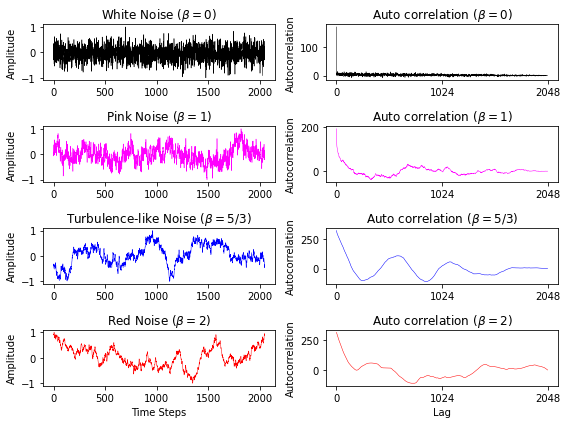

In [28]:


colors = ['black','magenta','blue','red']
titles = [ f'White Noise ($\\beta=$0)' ,f'Pink Noise ($\\beta=$1)', f'Turbulence-like Noise ($\\beta=$5/3)',f'Red Noise ($\\beta=$2)']
title_autocorrs = ['Auto correlation ($\\beta=$0)', 'Auto correlation ($\\beta=$1)', 'Auto correlation ($\\beta=$5/3)',  'Auto correlation ($\\beta=$2)']

fig, axs = plt.subplots(len(betas), 2, figsize=(8, 6))

for i, beta in enumerate(betas):
    axs[i, 0].plot(signals[i], color=colors[i],linewidth=0.5)
    axs[i, 0].set_title(titles[i])
    axs[i, 0].set_ylabel('Amplitude')
    axs[i, 1].plot(autocorrs[i][len(autocorrs[i])//2:],color=colors[i],linewidth=0.5)
    axs[i, 1].set_title(title_autocorrs[i])
    # Translate the x sticks values to the middle
    axs[i, 1].set_xticks(np.arange(0, size+1, size//2))
    axs[i, 1].set_ylabel('Autocorrelation')
    # ticks = np.arange(0, 2*size+1, size//2)
    # tick_labels = [str(int(tick - size)) for tick in ticks]
    # axs[i, 1].set_xticks(ticks)
    # axs[i, 1].set_xticklabels(tick_labels)
axs[-1, 0].set_xlabel('Time Steps')
axs[-1, 1].set_xlabel('Lag')

plt.tight_layout()
plt.savefig('figuras/autocorrelation_all_data.png',dpi=50,bbox_inches='tight')
plt.savefig('figuras/autocorrelation_all_data.pdf',dpi=50,bbox_inches='tight')
plt.show()

In [13]:
betas = [-2,-1,0,1,2]

# import NCGL
# cube_noise = []
# for i in range(len(betas)):
#   cube_noise.append(NCGL.cNoise(betas[i],[25,64,64]))

# #Save cube_noise in a npy file
# np.save('cube_noise.npy',cube_noise)

cube_noise = np.load('data/cube_noise.npy',allow_pickle=True)

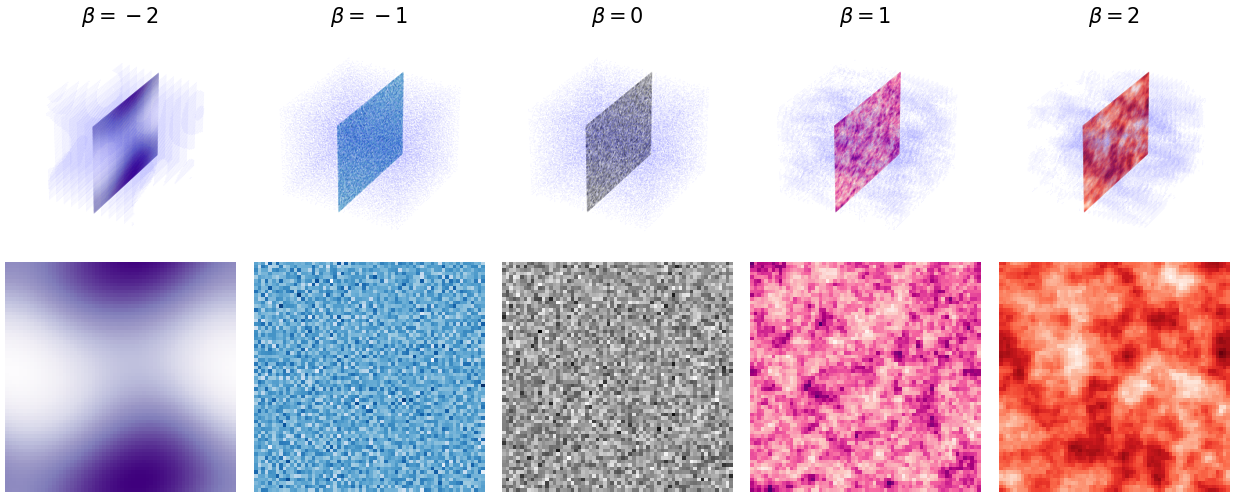

In [14]:
color_maps = ['Purples','Blues','Greys','RdPu','Reds']
color_lines = ['violet','blue' ,'black'  ,'pink','red']
import os

# for j in range(25):
fig = plt.figure(figsize=(25, 10),dpi=50)
for i, beta in enumerate(betas):
    noise_cube = cube_noise[i]
    selected_slice =noise_cube.shape[0]//2 #j

    # Plot 3D noise cube in the first row
    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    x, y, z = np.indices(noise_cube.shape)
    mask = noise_cube > noise_cube.mean() + 0.2 * noise_cube.std()
    ax.scatter(x[mask], y[mask], z[mask], alpha=0.05, color='blue',s=0.3)

    # Extract the selected slice for 3D plotting
    central_slice = noise_cube[selected_slice, :, :]
    Y, Z = np.meshgrid(range(64), range(64))
    X = np.full(Y.shape, selected_slice)

    # Plot the selected slice on the 3D plot
    # colors = plt.cm.viridis((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
    color_map = getattr(plt.cm, color_maps[i])
    colors = color_map((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
    ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, shade=False,alpha=0.5)

    ax.set_title(f'$\\beta = {betas[i]:.0f}$',size=30)
    ax.axis('off')

    # Plot 2D slice in the second row
    ax2 = fig.add_subplot(2, 5, i+6)
    ax2.imshow(np.flipud(central_slice), cmap=color_maps[i])
    # ax2.set_title(f'$\\beta = {betas[i]:.2f}$')
    ax2.axis('off')

plt.tight_layout()
#Create a folder to save the images if not exists
if not os.path.exists('images'): os.makedirs('images')
# path = 'images/'
# print(f'Saving image {j}')

# plt.savefig(f'{path}cube_noise_{j}.png')
# plt.savefig(f'figuras/cube_noise.png',dpi=50)
# plt.savefig(f'figuras/cube_noise.pdf',dpi=300)

plt.show()


In [15]:
len(cube_noise[2])

25

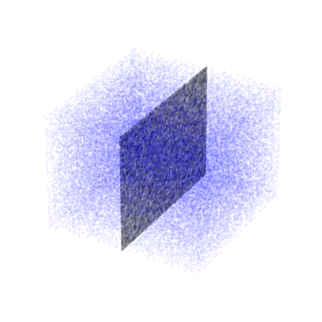

In [16]:
fig = plt.figure(figsize=(4, 4),dpi=100)
noise_cube = cube_noise[2]
selected_slice =noise_cube.shape[0]//2 #j


# Plot 3D noise cube in the first row
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y, z = np.indices(noise_cube.shape)
mask = noise_cube > noise_cube.mean() + 0.2 * noise_cube.std()
ax.scatter(x[mask], y[mask], z[mask], alpha=0.05, color='blue',s=0.3)

# Extract the selected slice for 3D plotting
central_slice = noise_cube[selected_slice, :, :]
Y, Z = np.meshgrid(range(64), range(64))
X = np.full(Y.shape, selected_slice)

# Plot the selected slice on the 3D plot
# colors = plt.cm.viridis((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
color_map = getattr(plt.cm, 'gray')
colors = color_map((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, shade=False,alpha=0.5)
ax.axis('off')
plt.savefig('figuras/cube_noise_method.svg',dpi=100)

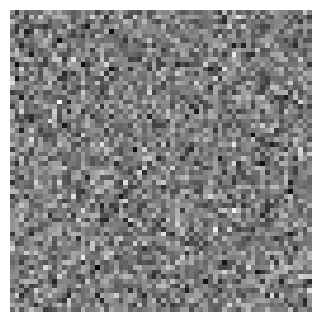

In [17]:
fig = plt.figure(figsize=(4, 4),dpi=100)
noise_cube = cube_noise[2]
selected_slice =noise_cube.shape[0]//2 #j


# Plot 3D noise cube in the first row
ax = fig.add_subplot(1, 1, 1)
# ax = fig.add_subplot(2, 5, i+6)
ax.imshow(np.flipud(central_slice), 'gray')
# ax.set_title(f'$\\beta = {betas[i]:.2f}$')
ax.axis('off')
plt.savefig('figuras/snapshop_noise_method.svg',dpi=50)


In [18]:
# !pip install numpy scipy matplotlib

<ipython-input-32-e001d4d8100f>:8: WavFileWarning:

Chunk (non-data) not understood, skipping it.

<ipython-input-32-e001d4d8100f>:27: RuntimeWarning:

divide by zero encountered in log10



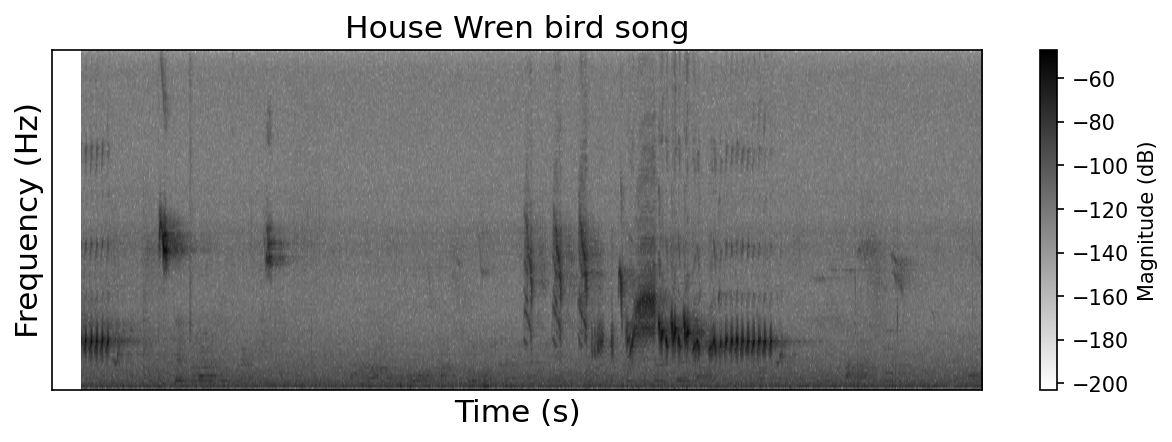

In [32]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from IPython.display import Audio, display

# Load the .wav file
sample_rate, data = wav.read('data/2024-04-28 08_32 voltando da corrida.wav')

# If stereo, take only one channel
if data.ndim > 1:
    data = data[:, 0]

# Generate the spectrogram
frequencies, times, Sxx = spectrogram(data, sample_rate)

font_size = 15

min_freq = frequencies.min()
max_freq = frequencies.max()


# Plot the spectrogram with inverted color scale
plt.figure(figsize=(10, 3),dpi=150)
# plt.suptitle("House Wren bird song",fontsize = font_size)
# plt.subplot(2,2,(1,2))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='gray_r', origin='lower', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (s)',fontsize=font_size)
plt.ylabel('Frequency (Hz)',fontsize=font_size)
plt.ylim(min_freq, max_freq)
plt.title('House Wren bird song',fontsize=font_size)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)  # Hide axis values but k


# plt.tight_layout()
plt.savefig('figuras/ebird.png',dpi=200)
plt.savefig('figuras/ebird.pdf',dpi=200)
# plt.show()
# display(Audio('2024-04-28 08_32 voltando da corrida.wav'))

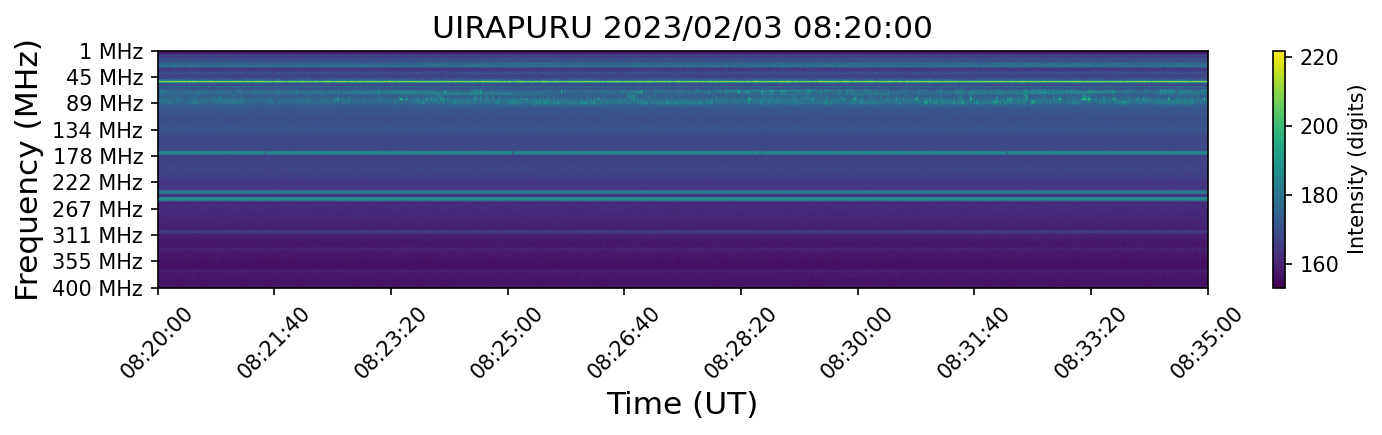

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from datetime import datetime, timedelta
from scipy.signal import welch

# Open the FITS file
hdul = fits.open('data/UIRAPURU_20230203_082000_59.fit')
image_data = hdul[0].data
header = hdul[0].header
hdul.close()

# Extract header information
time_obs = header['TIME-OBS']
date_obs = header['DATE-OBS']
crval1 = header['CRVAL1']
crpix1 = header['CRPIX1']
cdelt1 = header['CDELT1']

crval2 = header['CRVAL2']
crpix2 = header['CRPIX2']
cdelt2 = header['CDELT2']

# Convert time observation to datetime object
start_time = datetime.strptime(f'{date_obs} {time_obs}', '%Y/%m/%d %H:%M:%S.%f')

# Calculate time axis in seconds and convert to datetime
time_axis = [start_time + timedelta(seconds=cdelt1 * (i - crpix1)) for i in range(image_data.shape[1])]

# Calculate frequency axis
frequency_axis = crval2 + (np.arange(image_data.shape[0]) - crpix2) * cdelt2

# Calculate the power spectrum (average over all time points)
frequencies, power_spectrum = welch(image_data.mean(axis=1), fs=1/abs(cdelt2))

# Plotting
font_size = 15
plt.figure(figsize=(10, 3),dpi=150)
plt.imshow(image_data, aspect='auto', cmap='viridis', origin='lower', 
           extent=[0, len(time_axis)-1, frequency_axis[0], frequency_axis[-1]])
plt.colorbar(label='Intensity (digits)')

xticks = np.linspace(0, len(time_axis)-1, num=10)
xtick_labels = [time_axis[int(t)].strftime('%H:%M:%S') for t in xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

yticks = np.linspace(frequency_axis[0], frequency_axis[-1], num=10)
ytick_labels = [f'{int(f)} MHz' for f in yticks]
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.xlabel('Time (UT)', fontsize=font_size)
plt.ylabel('Frequency (MHz)', fontsize=font_size)
plt.title('UIRAPURU 2023/02/03 08:20:00', fontsize=font_size)
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, 
                labelbottom=True, labelleft=True)
plt.tight_layout()

plt.savefig('figuras/UIRAPURU.png',dpi=300)
plt.savefig('figuras/UIRAPURU.pdf',dpi=100)
plt.show()
